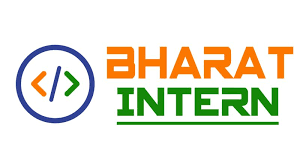

# Data Science Internship 
# - Anisha Walde
# Task 1 - Stock Prediction 

Stock Price Prediction with LSTM using Microsoft (MSFT) Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv('MSFT.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=8857, step=1)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,8857.0,3.483123e+01,4.406016e+01,8.854200e-02,3.843750e+00,2.659000e+01,3.673000e+01,2.616600e+02
High,8857.0,3.520935e+01,4.451344e+01,9.201400e-02,3.875000e+00,2.688000e+01,3.700000e+01,2.631900e+02
Low,8857.0,3.444966e+01,4.359770e+01,8.854200e-02,3.812500e+00,2.629000e+01,3.611000e+01,2.601700e+02
Close,8857.0,3.484089e+01,4.408099e+01,9.027800e-02,3.851563e+00,2.659000e+01,3.666000e+01,2.619700e+02
Adj Close,8857.0,2.988654e+01,4.419510e+01,5.734015e-02,2.446323e+00,1.868663e+01,2.721830e+01,2.619700e+02
Volume,8857.0,5.953411e+07,3.858121e+07,2.304000e+06,3.559720e+07,5.269680e+07,7.339520e+07,1.031789e+09


In [9]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


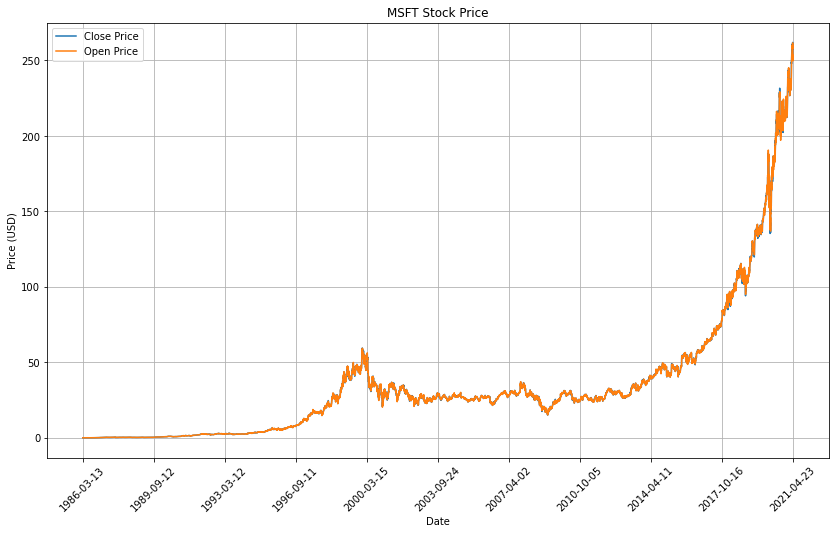

In [11]:
# Visualize the data
plt.figure(figsize=(14, 8))
plt.title('MSFT Stock Price')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(np.arange(0, len(df), step=len(df)//10), rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Data Preprocessing

In [12]:
# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
n_steps = 30

# Create sequences of data with the specified time steps
X, y = [], []
for i in range(n_steps, len(data)):
    X.append(data[i - n_steps:i, 0])
    y.append(data[i, 0])

X, y = np.array(X), np.array(y)

In [13]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_size = int(len(data) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM Model

In [14]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Train the Model

In [15]:
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32 ,validation_data=(X_test, y_test))

Epoch 1/50
222/222 [==============================] - 9s 25ms/step - loss: 3.7783e-04 - val_loss: 0.0100
Epoch 2/50
222/222 [==============================] - 5s 22ms/step - loss: 2.3452e-05 - val_loss: 0.0099
Epoch 3/50
222/222 [==============================] - 4s 20ms/step - loss: 2.2862e-05 - val_loss: 0.0086
Epoch 4/50
222/222 [==============================] - 4s 16ms/step - loss: 1.9436e-05 - val_loss: 0.0043
Epoch 5/50
222/222 [==============================] - 4s 16ms/step - loss: 1.9048e-05 - val_loss: 0.0056
Epoch 6/50
222/222 [==============================] - 4s 16ms/step - loss: 1.7587e-05 - val_loss: 0.0025
Epoch 7/50
222/222 [==============================] - 4s 16ms/step - loss: 1.6891e-05 - val_loss: 0.0020
Epoch 8/50
222/222 [==============================] - 4s 16ms/step - loss: 1.6112e-05 - val_loss: 8.6731e-04
Epoch 9/50
222/222 [==============================] - 4s 16ms/step - loss: 1.6398e-05 - val_loss: 0.0022
Epoch 10/50
222/222 [==============================

# Evaluate the Model

In [16]:
# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}")

55/55 [==============================] - 1s 10ms/step - loss: 0.0016
Test Loss: 0.00159


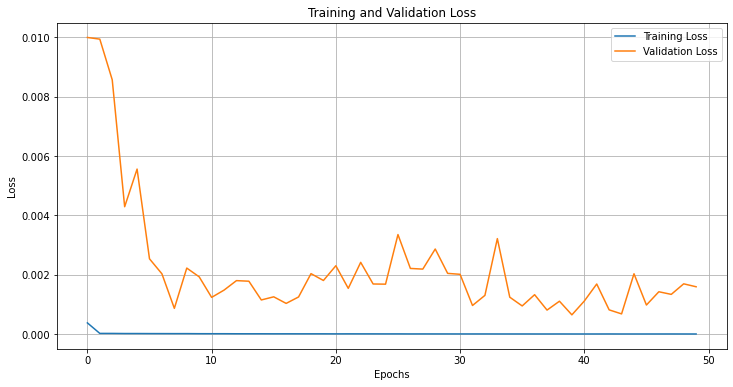

In [17]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make Predictions

In [18]:
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions = scaler.inverse_transform(predictions)

55/55 [==============================] - 1s 10ms/step


# Visualize the Predicted and Actual Stock Prices

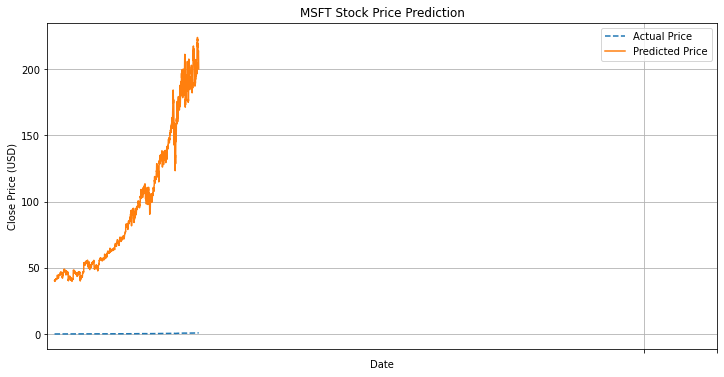

In [19]:
# Plot Predicted and Actual Stock Prices
plt.figure(figsize=(12, 6))
plt.title('MSFT Stock Price Prediction')
plt.plot(df['Date'].values[train_size + n_steps:], y_test, label='Actual Price', linestyle='--')
plt.plot(df['Date'].values[train_size + n_steps:], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(np.arange(train_size + n_steps, len(df), step=len(df)//10), rotation=45)
plt.grid(True)
plt.show()

# Visualize Residuals (Prediction Errors):

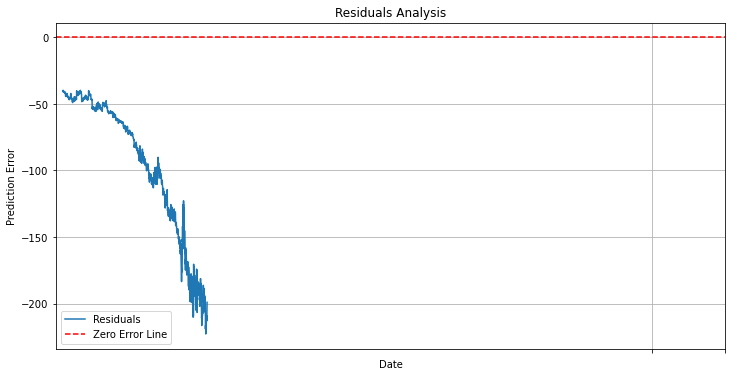

In [20]:
residuals = y_test - predictions.reshape(-1)

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.title('Residuals Analysis')
plt.plot(df['Date'].values[train_size + n_steps:], residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.legend()
plt.xticks(np.arange(train_size + n_steps, len(df), step=len(df)//10), rotation=45)
plt.grid(True)
plt.show()


# Visualize Model Predictions vs. Actual Prices on the Training Data

222/222 [==============================] - 2s 9ms/step


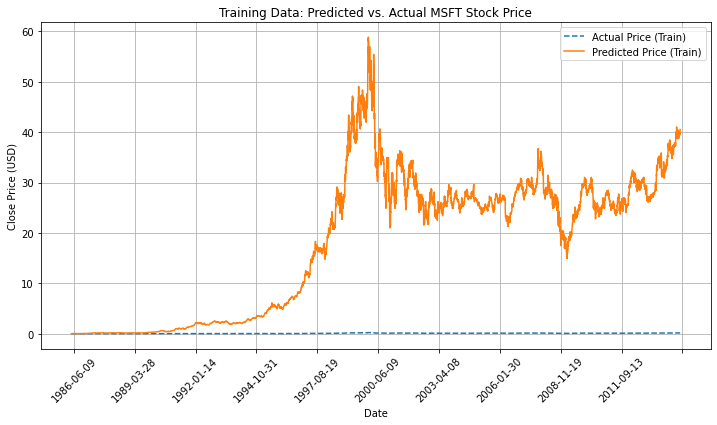

In [21]:
# predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

# Plot the Predicted vs. Actual Stock Prices on the training data
plt.figure(figsize=(12, 6))
plt.title('Training Data: Predicted vs. Actual MSFT Stock Price')
plt.plot(df['Date'].values[n_steps:train_size + n_steps], y_train, label='Actual Price (Train)', linestyle='--')
plt.plot(df['Date'].values[n_steps:train_size + n_steps], train_predictions, label='Predicted Price (Train)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(np.arange(n_steps, train_size + n_steps, step=train_size//10), rotation=45)
plt.grid(True)
plt.show()


Thank You 